In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

from itertools import chain
from functools import partial
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm
import pickle

In [3]:
from evolving_comm_network import *

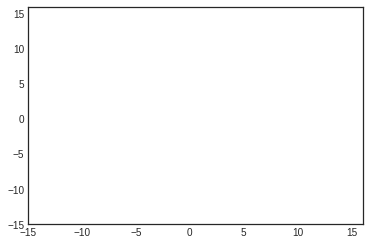

In [4]:
fig = plt.figure()
ax = plt.axes(xlim=(-15, 16), ylim=(-15, 16))
particles_d, = ax.plot([], [], 'bo', ms=2)
particles_c, = ax.plot([], [], 'ro', ms=2)
#parents, = ax.plot([], [], 'ro', ms=4)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# initialization function: plot the background of each frame
def init():
    particles_c.set_data([], [])
    particles_d.set_data([], [])
    #parents.set_data([], [])
    time_text.set_text('')
    return particles_c,particles_d,time_text

# animation function.  This is called sequentially
def animate(i):
    global locs,loc_c,loc_d
    x_c = [z[0] for z in loc_c[i]]
    y_c = [z[1] for z in loc_c[i]]
    particles_c.set_data(x_c,y_c)
    x_d = [z[0] for z in loc_d[i]]
    y_d = [z[1] for z in loc_d[i]]
    particles_d.set_data(x_d,y_d)
    time_text.set_text('Time = %.1f' % i)
    return particles_c,particles_d, time_text

In [5]:
PD1 = Simulation_PD(n_agents = 50, n_bandits = 10, type_bandits = bernoulli_arms, type_alg = discounted_thompson, n_gen = 2000, clustering=False, evolving_strategies = True, initial_coop=1, alpha = 2, gamma = 1/2, beta = 0.2)

In [6]:
locs,loc_c,loc_d, size_cluster, coop_ratios, info_sharing_clusters, p_val = PD1.plot_data_mult_gen(evolving_strategies = True, noise=0.005, v_max = 1, eta = 0.01, normalise = False, limit_interactions = False, interaction_radius = float('inf'))

Progress: [#############################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [7]:
clusters = np.array([list(i) for i in size_cluster])
coops = np.array([list(i) for i in coop_ratios])
#print (info_sharing_clusters)
sharing = np.array([i for i in info_sharing_clusters])
#print (p_val)
p = np.array([list(i) for i in p_val])

with open('loc_c_50_various_1.txt', 'wb') as handle:
    pickle.dump(loc_c, handle)

with open('loc_d_50_various_1.txt', 'wb') as handle:
    pickle.dump(loc_d, handle)
    
with open('clusters_50_various_1.txt', 'wb') as handle:
    pickle.dump(clusters, handle)

with open('coops_50_various_1.txt', 'wb') as handle:
    pickle.dump(coops, handle)
    
with open('info_groups_50_various_1.txt', 'wb') as handle:
    pickle.dump(sharing, handle)

with open('p_50_various_1.txt', 'wb') as handle:
    pickle.dump(p, handle)

In [5]:
with open('loc_c_50_various_1.txt', 'rb') as handle:
    loc_c = pickle.load(handle)
    
with open('loc_d_50_various_1.txt', 'rb') as handle:
    loc_d = pickle.load(handle)

In [ ]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=100, blit=True)
rc('animation', html='html5')
anim

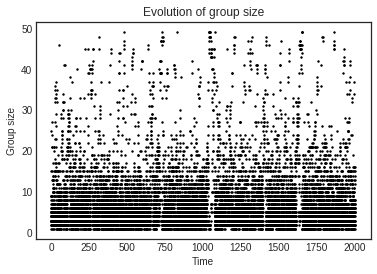

<Figure size 432x288 with 0 Axes>

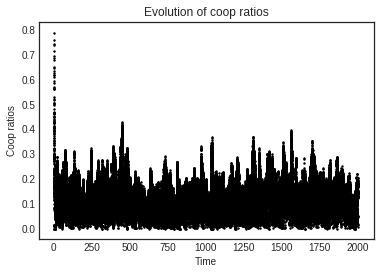

<Figure size 432x288 with 0 Axes>

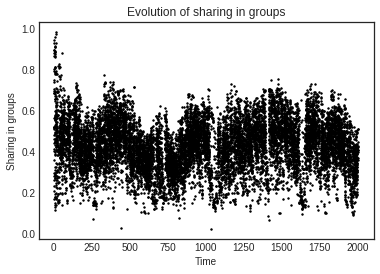

<Figure size 432x288 with 0 Axes>

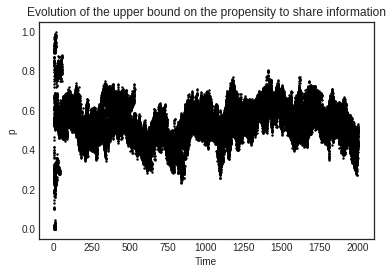

In [8]:
t_list = [i for i in range(1,2001)]
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(clusters[t-1]))],clusters[t-1],marker='o', s=2, color='k')
plt.ylabel('Group size')
plt.xlabel('Time')
plt.title('Evolution of group size')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(coops[t-1]))],coops[t-1], marker='o', s=2, color='k')
plt.ylabel('Coop ratios')
plt.xlabel('Time')
plt.title('Evolution of coop ratios')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(sharing[t-1]))],sharing[t-1], marker='o', s=2, color='k')
plt.ylabel('Sharing in groups')
plt.xlabel('Time')
plt.title('Evolution of sharing in groups')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(p[t-1]))],p[t-1], marker='o', s=2, color='k')
plt.ylabel('p')
plt.xlabel('Time')
plt.title('Evolution of the upper bound on the propensity to share information')
plt.show()

In [9]:
PD2 = Simulation_PD(n_agents = 50, n_bandits = 10, type_bandits = bernoulli_arms, type_alg = discounted_thompson, n_gen = 500, clustering=False, evolving_strategies = True, initial_coop=1, alpha = 2, gamma = 1/4, beta = 0.2)

Progress: [####################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################] 100.0%
Duration: 1:17:56


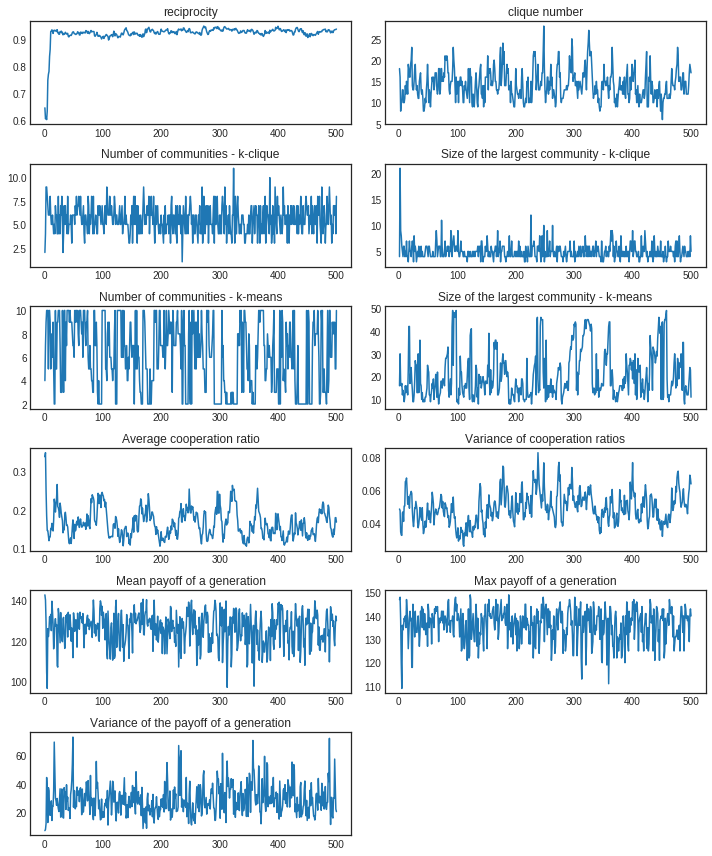

In [10]:
locs,loc_c,loc_d, size_cluster, coop_ratios, info_sharing_clusters, p_val = PD2.plot_data_mult_gen(evolving_strategies = True, noise=0.01, v_max = 1, eta = 0.01, normalise = False, limit_interactions = False, interaction_radius = float('inf'))

In [11]:
clusters = np.array([list(i) for i in size_cluster])
coops = np.array([list(i) for i in coop_ratios])
#print (info_sharing_clusters)
sharing = np.array([i for i in info_sharing_clusters])
#print (p_val)
p = np.array([list(i) for i in p_val])

with open('loc_c_50_various_2.txt', 'wb') as handle:
    pickle.dump(loc_c, handle)

with open('loc_d_50_various_2.txt', 'wb') as handle:
    pickle.dump(loc_d, handle)
    
with open('clusters_50_various_2.txt', 'wb') as handle:
    pickle.dump(clusters, handle)

with open('coops_50_various_2.txt', 'wb') as handle:
    pickle.dump(coops, handle)
    
with open('info_groups_50_various_2.txt', 'wb') as handle:
    pickle.dump(sharing, handle)

with open('p_50_various_2.txt', 'wb') as handle:
    pickle.dump(p, handle)

In [ ]:
with open('loc_c_50_various_2.txt', 'rb') as handle:
    loc_c = pickle.load(handle)
    
with open('loc_d_50_various_2.txt', 'rb') as handle:
    loc_d = pickle.load(handle)

In [ ]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=100, blit=True)
rc('animation', html='html5')
anim

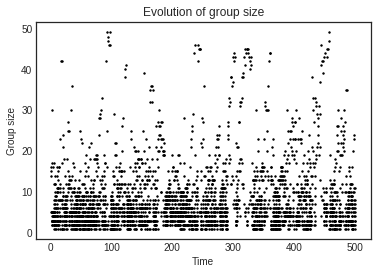

<Figure size 432x288 with 0 Axes>

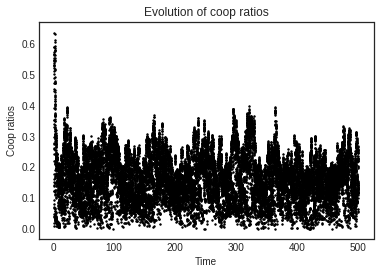

<Figure size 432x288 with 0 Axes>

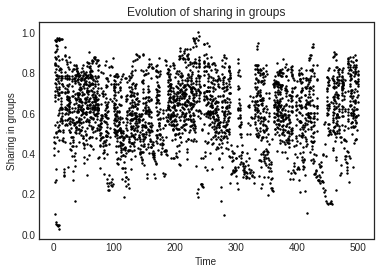

<Figure size 432x288 with 0 Axes>

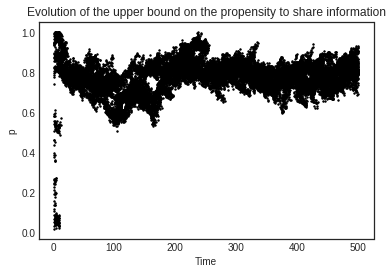

In [12]:
t_list = [i for i in range(1,501)]
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(clusters[t-1]))],clusters[t-1],marker='o', s=2, color='k')
plt.ylabel('Group size')
plt.xlabel('Time')
plt.title('Evolution of group size')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(coops[t-1]))],coops[t-1], marker='o', s=2, color='k')
plt.ylabel('Coop ratios')
plt.xlabel('Time')
plt.title('Evolution of coop ratios')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(sharing[t-1]))],sharing[t-1], marker='o', s=2, color='k')
plt.ylabel('Sharing in groups')
plt.xlabel('Time')
plt.title('Evolution of sharing in groups')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(p[t-1]))],p[t-1], marker='o', s=2, color='k')
plt.ylabel('p')
plt.xlabel('Time')
plt.title('Evolution of the upper bound on the propensity to share information')
plt.show()

In [13]:
PD3 = Simulation_PD(n_agents = 50, n_bandits = 10, type_bandits = bernoulli_arms, type_alg = discounted_thompson, n_gen = 2000, clustering=False, evolving_strategies = True, initial_coop=1, alpha = 2, gamma = 1/2, beta = 0.2, const_initial_strategy = True, initial_strategy = 0.8)

Progress: [#############################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

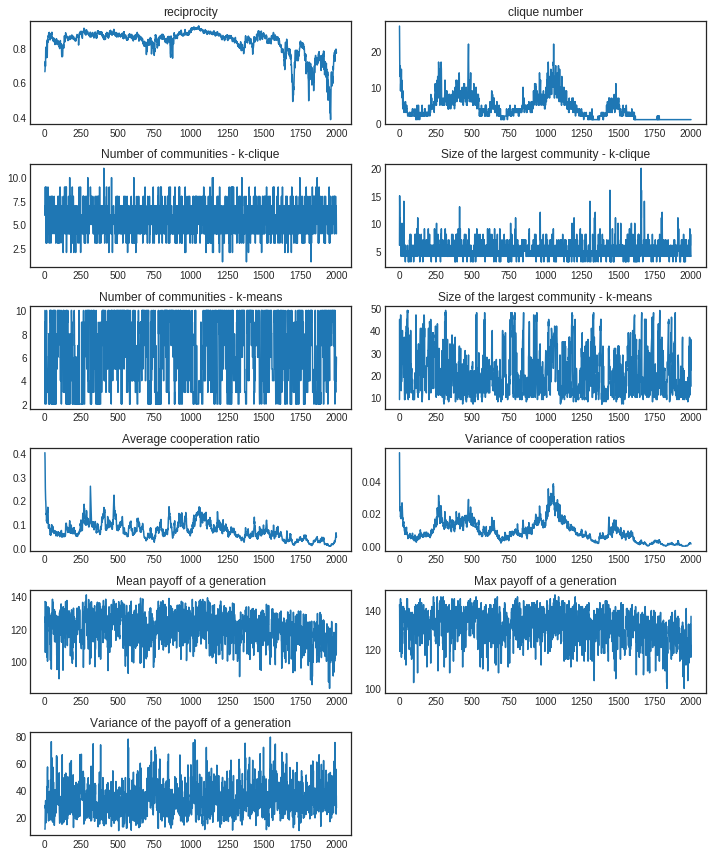

In [14]:
locs,loc_c,loc_d, size_cluster, coop_ratios, info_sharing_clusters, p_val = PD3.plot_data_mult_gen(evolving_strategies = True, noise=0.005, v_max = 1, eta = 0.01, normalise = False, limit_interactions = False, interaction_radius = float('inf'))

In [15]:
clusters = np.array([list(i) for i in size_cluster])
coops = np.array([list(i) for i in coop_ratios])
#print (info_sharing_clusters)
sharing = np.array([i for i in info_sharing_clusters])
#print (p_val)
p = np.array([list(i) for i in p_val])

with open('loc_c_50_various_3.txt', 'wb') as handle:
    pickle.dump(loc_c, handle)

with open('loc_d_50_various_3.txt', 'wb') as handle:
    pickle.dump(loc_d, handle)
    
with open('clusters_50_various_3.txt', 'wb') as handle:
    pickle.dump(clusters, handle)

with open('coops_50_various_3.txt', 'wb') as handle:
    pickle.dump(coops, handle)
    
with open('info_groups_50_various_3.txt', 'wb') as handle:
    pickle.dump(sharing, handle)

with open('p_50_various_3.txt', 'wb') as handle:
    pickle.dump(p, handle)

In [ ]:
with open('loc_c_50_various_3.txt', 'rb') as handle:
    loc_c = pickle.load(handle)
    
with open('loc_d_50_various_3.txt', 'rb') as handle:
    loc_d = pickle.load(handle)
    
with open('clusters_50_various_3.txt', 'rb') as handle:
    clusters = pickle.load(handle)
    
with open('coops_50_various_3.txt', 'rb') as handle:
    coops = pickle.load(handle)
    
with open('info_groups_50_various_3.txt', 'rb') as handle:
    sharing = pickle.load(handle)

with open('p_50_various_3.txt', 'rb') as handle:
    p = pickle.load(handle)

In [ ]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=100, blit=True)
rc('animation', html='html5')
anim

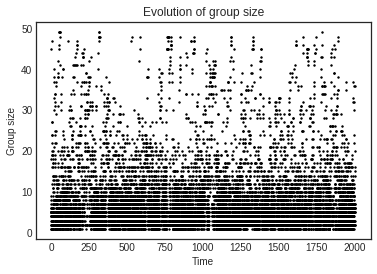

<Figure size 432x288 with 0 Axes>

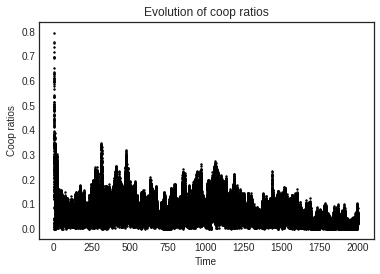

<Figure size 432x288 with 0 Axes>

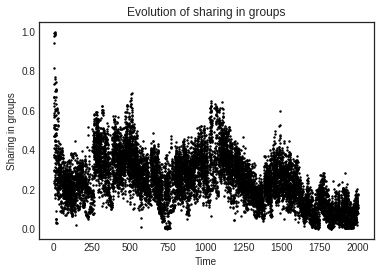

<Figure size 432x288 with 0 Axes>

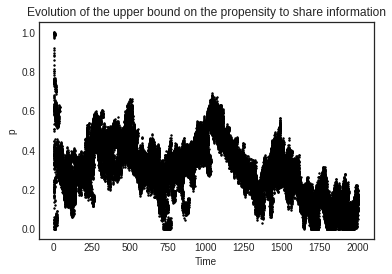

In [14]:
t_list = [i for i in range(1,2001)]
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(clusters[t-1]))],clusters[t-1],marker='o', s=2, color='k')
plt.ylabel('Group size')
plt.xlabel('Time')
plt.title('Evolution of group size')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(coops[t-1]))],coops[t-1], marker='o', s=2, color='k')
plt.ylabel('Coop ratios')
plt.xlabel('Time')
plt.title('Evolution of coop ratios')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(sharing[t-1]))],sharing[t-1], marker='o', s=2, color='k')
plt.ylabel('Sharing in groups')
plt.xlabel('Time')
plt.title('Evolution of sharing in groups')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(p[t-1]))],p[t-1], marker='o', s=2, color='k')
plt.ylabel('p')
plt.xlabel('Time')
plt.title('Evolution of the upper bound on the propensity to share information')
plt.show()

In [17]:
PD4 = Simulation_PD(n_agents = 50, n_bandits = 10, type_bandits = bernoulli_arms, type_alg = discounted_thompson, n_gen = 2000, clustering=False, evolving_strategies = True, initial_coop=1, alpha = 2, gamma = 1/2, beta = 0.2, const_initial_strategy = True, initial_strategy = 0.8)

Progress: [#############################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

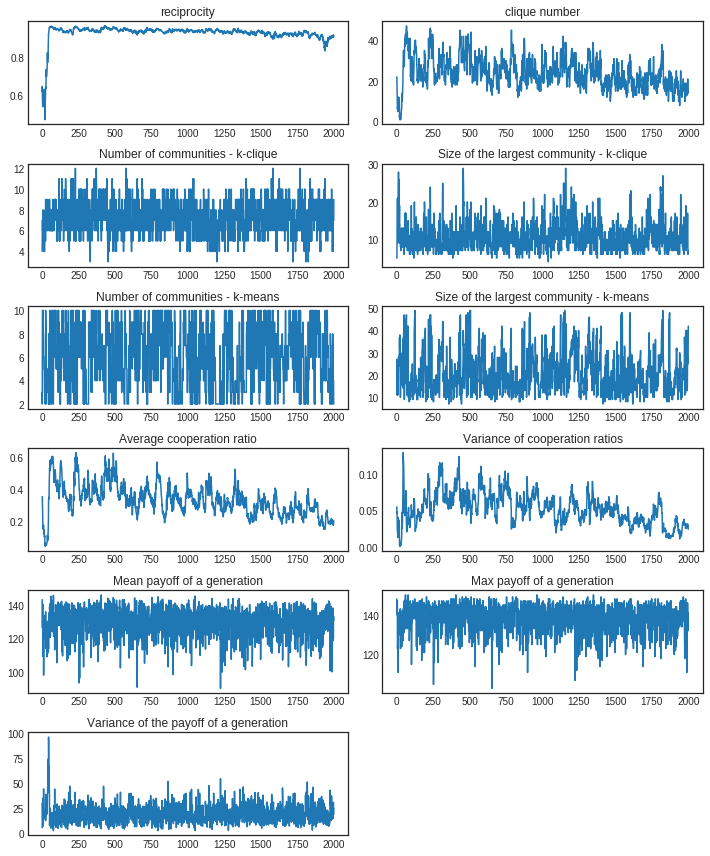

In [18]:
locs,loc_c,loc_d, size_cluster, coop_ratios, info_sharing_clusters, p_val = PD4.plot_data_mult_gen(evolving_strategies = True, noise=0.005, v_max = 0.25, eta = 0.01, normalise = False, limit_interactions = False, interaction_radius = float('inf'))

In [19]:
clusters = np.array([list(i) for i in size_cluster])
coops = np.array([list(i) for i in coop_ratios])
#print (info_sharing_clusters)
sharing = np.array([i for i in info_sharing_clusters])
#print (p_val)
p = np.array([list(i) for i in p_val])

with open('loc_c_50_various_4.txt', 'wb') as handle:
    pickle.dump(loc_c, handle)

with open('loc_d_50_various_4.txt', 'wb') as handle:
    pickle.dump(loc_d, handle)
    
with open('clusters_50_various_4.txt', 'wb') as handle:
    pickle.dump(clusters, handle)

with open('coops_50_various_4.txt', 'wb') as handle:
    pickle.dump(coops, handle)
    
with open('info_groups_50_various_4.txt', 'wb') as handle:
    pickle.dump(sharing, handle)

with open('p_50_various_4.txt', 'wb') as handle:
    pickle.dump(p, handle)

In [ ]:
with open('loc_c_50_various_4.txt', 'rb') as handle:
    loc_c = pickle.load(handle)
    
with open('loc_d_50_various_4.txt', 'rb') as handle:
    loc_d = pickle.load(handle)

In [ ]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=100, blit=True)
rc('animation', html='html5')
anim

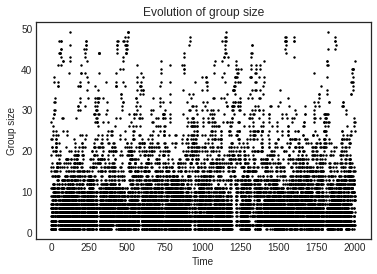

<Figure size 432x288 with 0 Axes>

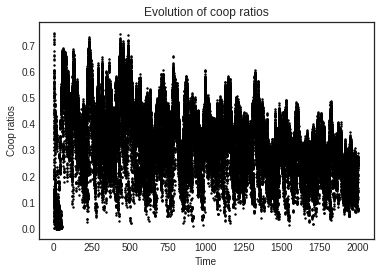

<Figure size 432x288 with 0 Axes>

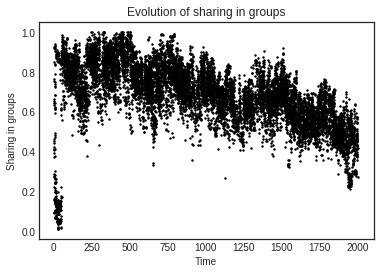

<Figure size 432x288 with 0 Axes>

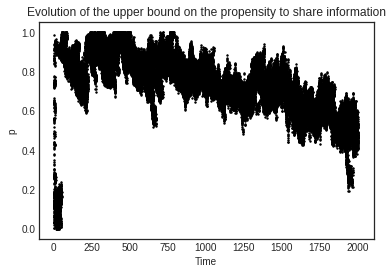

In [20]:
t_list = [i for i in range(1,2001)]
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(clusters[t-1]))],clusters[t-1],marker='o', s=2, color='k')
plt.ylabel('Group size')
plt.xlabel('Time')
plt.title('Evolution of group size')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(coops[t-1]))],coops[t-1], marker='o', s=2, color='k')
plt.ylabel('Coop ratios')
plt.xlabel('Time')
plt.title('Evolution of coop ratios')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(sharing[t-1]))],sharing[t-1], marker='o', s=2, color='k')
plt.ylabel('Sharing in groups')
plt.xlabel('Time')
plt.title('Evolution of sharing in groups')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(p[t-1]))],p[t-1], marker='o', s=2, color='k')
plt.ylabel('p')
plt.xlabel('Time')
plt.title('Evolution of the upper bound on the propensity to share information')
plt.show()